<a href="https://colab.research.google.com/github/DuarteVn/CNN-Classificacao-Doenca-Sauron/blob/main/N1_CNN_Classificacao_da_Doen%C3%A7a_Sauron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disciplina Tópicos Avançados de IA - Deep Learning

## 1o Projeto em equipe
### Classificação de imagens de amostras positivas/negativas para Sauron
Prazo de Entrega: 04/07/2025

## Descrição

De acordo com o Ministério da Saúde de Areia-Média, a Sauron *(1)* é uma doença infecciosa, causada por vírus e transmitida por contato a flecha do Orcas. A doença tem cura e o tratamento é eficaz, porém pode haver evolução para formas graves se não for diagnosticada e tratada precocemente.

Você foi convidado pela ONG "Elfos Muito Legais *(2)*" para participar de um projeto de identificação automática de células infectadas pela doença Sauron. A ONG disponibilizou um Dataset de imagens de amostras de lâminas de sangue.

As imagens podem ser obtidas através do link: https://drive.google.com/file/d/1DMCJ1rxdp5uTifqChdlJlYX16I8l2H5A/view?usp=sharing

O Dataset possui uma pasta "Imagens_Supeita_Sauron" contendo as subpastas "Positivo" e "Negativo" com 13780 imagens cada.

Exemplo de uma imagem de amostra com resultado Negativo para Sauron:

<img src="https://drive.google.com/uc?export=view&id=1abrawMoLenFjUExYKxYYvCW2wivYwI8t" alt="drawing" width="100"/>

Exemplo de uma imagem de amostra com resultado Positivo para Sauron:

<img src="https://drive.google.com/uc?export=view&id=1tsyWUHgFrFpDdnMOFGpZwUtSHeDByCyY" alt="drawing" width="100"/>


--

*(1) (2) - A ONG e a doença são fictícias*

##Classificação através de uma CNN

1. Separe o dataset em pelo menos 80% para treino, 10% para validaçao e 10% para teste.

2. Use data augmentation para aprimorar a acurácia da CNN.

3. Construa uma CNN com duas camadas (Convolução/Pooling) e outra CNN com mais camadas para classificar as imagens em positivas ou negativas para Sauron.

4. Inclua um 2o arquivo notebook com a aplicação da técnica de Fine Tuning, utilizando um modelo pré treinado, diferente do VGG16, adequado ao tipo de dado do problema (faça uma busca nos repositórios vistos em sala ou outros). Se organizem para cada equipe usar um modelo pré-treinado diferente.

5. Compare os resultados

  - Exiba os gráficos da evolução da acurácia e da perda do treino e da validação.

  - O melhor modelo final deve ter uma acurácia superior a 85% no dataset de teste.

6. Salve o melhor modelo em um arquivo apropriado.

Obs.: Inclua comentários no código fonte e textos no notebook com as explicações de como foi feito. Poste o arquivo do notebook na resposta da atividade no google Classroom.

**Importante:**

0. O Dataset de validação normalmente é utilizado para identificar os melhores hiperparâmetros do modelo.
1. **Reduza o tamanho do Dataset de treino e validação, enquanto está identificando os melhores hiperparâmetros.** Assim, o treinamento será mais rápido nesta etapa.
2. Quando encontrar os melhores hiperparâmetros, use o tamanho original dos Datasets para o treinamento final.
3. O dataset de teste deve ser utilizado com os métodos evaluate depois do treinamento.
4. Não esqueça de configurar a **GPU no notebook** do Google Colab

# ALUNOS:



*   Nirton Afonso
*   Vinícius Duarte
* Pedro Henrique Dermarch



## ETAPA 1: Importando bibliotecas

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split


## Etapa 2: Download dataset

In [ ]:
!gdown --id 1Bb9ioy6IgcXktvbVlkXTtuLdiIWFDyel

# import gdown
# gdown.download("https://drive.google.com/file/d/1Bb9ioy6IgcXktvbVlkXTtuLdiIWFDyel/view?usp=sharing", "Imagens_Supeita_Sauron.zip", quiet=False)

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Bb9ioy6IgcXktvbVlkXTtuLdiIWFDyel
From (redirected): https://drive.google.com/uc?id=1Bb9ioy6IgcXktvbVlkXTtuLdiIWFDyel&confirm=t&uuid=ccb4964c-a2c7-4fff-a7fd-2ee56e6f99fb
To: /content/Imagens_Supeita_Sauron.zip
100% 354M/354M [00:04<00:00, 74.8MB/s]


In [ ]:
!unzip Imagens_Supeita_Sauron.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
 extracting: Imagens_Supeita_Sauron/Positivo/C45P6ThinF_IMG_20151130_160409_cell_196.png  
 extracting: Imagens_Supeita_Sauron/Positivo/C45P6ThinF_IMG_20151130_160409_cell_197.png  
 extracting: Imagens_Supeita_Sauron/Positivo/C45P6ThinF_IMG_20151130_160409_cell_198.png  
 extracting: Imagens_Supeita_Sauron/Positivo/C45P6ThinF_IMG_20151130_160409_cell_199.png  
 extracting: Imagens_Supeita_Sauron/Positivo/C45P6ThinF_IMG_20151130_160409_cell_200.png  
 extracting: Imagens_Supeita_Sauron/Positivo/C45P6ThinF_IMG_20151130_160409_cell_201.png  
 extracting: Imagens_Supeita_Sauron/Positivo/C46P7ThinF_IMG_20151130_205558_cell_147.png  
 extracting: Imagens_Supeita_Sauron/Positivo/C46P7ThinF_IMG_20151130_205558_cell_148.png  
 extracting: Imagens_Supeita_Sauron/Positivo/C46P7ThinF_IMG_20151130_205558_cell_149.png  
 extracting: Imagens_Supeita_Sauron/Positivo/C46P7ThinF_IMG_20151130_205558_cell_150.png  
 extracting: Imagens_Supeita_Sa

In [ ]:
import zipfile

# Caminho do arquivo zip
zip_path = "Imagens_Supeita_Sauron.zip"

# Extrai todos os arquivos para a mesma pasta do zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()  # Ou passe um caminho para extrair em outra pasta

print("Arquivo descompactado com sucesso!")


Arquivo descompactado com sucesso!


In [ ]:
# dir_path = '/content/Imagens_Supeita_Sauron'

dir_path = "Imagens_Supeita_Sauron"

positive = len(os.listdir(os.path.join(dir_path, 'Positivo')))
negative = len(os.listdir(os.path.join(dir_path, 'Negativo')))
print(f'Positivas: {positive}, Negativas: {negative}')


Positivas: 13780, Negativas: 13780


## Etapa 3: Divisão Treino, Validação e Teste (80/10/10)

In [ ]:
# Geração dos dados com augmentation só para treino
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    validation_split=0.2  # 10% validação + 10% teste
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Dados de treino e validação
train_generator = train_datagen.flow_from_directory(
    dir_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dir_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


##  Etapa 4: CNN Simples (2 camadas)

In [ ]:
model_simple = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_simple = model_simple.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True)
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 130s 180ms/step - accuracy: 0.7059 - loss: 0.5818 - val_accuracy: 0.9287 - val_loss: 0.2376
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 122s 177ms/step - accuracy: 0.9153 - loss: 0.2548 - val_accuracy: 0.8864 - val_loss: 0.2594
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 121s 175ms/step - accuracy: 0.9264 - loss: 0.2321 - val_accuracy: 0.9332 - val_loss: 0.2189
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 121s 176ms/step - accuracy: 0.9260 - loss: 0.2163 - val_accuracy: 0.9328 - val_loss: 0.2060
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 139s 202ms/step - accuracy: 0.9331 - loss: 0.2137 - val_accuracy: 0.9330 - val_loss: 0.1987
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 120s 175ms/step - accuracy: 0.9436 - loss: 0.1897 - val_accuracy: 0.9407 - val_loss: 0.1759
Epoch 7/10
651/689 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9452 - loss: 0.1834

 ## Etapa 5: Plotar Gráficos

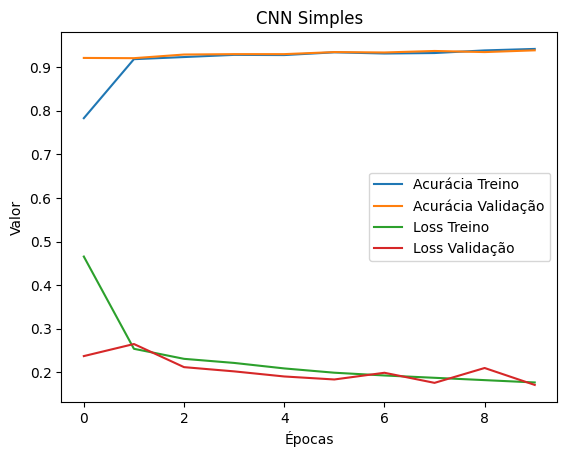

In [ ]:
def plot_history(history, title='Modelo'):
    plt.plot(history.history['accuracy'], label='Acurácia Treino')
    plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
    plt.plot(history.history['loss'], label='Loss Treino')
    plt.plot(history.history['val_loss'], label='Loss Validação')
    plt.title(f'{title}')
    plt.xlabel('Épocas')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

plot_history(history_simple, title='CNN Simples')


## Etapa 6: Save the model

In [ ]:
model_simple.save('cnn_simples_sauron.h5')

# Etapa 7: CNN Profunda

In [ ]:
model_deep = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Etapa 8: Treinamento

In [ ]:
history_deep = model_deep.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)


Epoch 1/10


2025-07-30 12:12:34.039243: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.14 = (f32[32,128,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,30,30]{3,2,1,0} %bitcast.5974, f32[128,64,3,3]{3,2,1,0} %bitcast.5158, f32[128]{0} %bitcast.6034), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1_1/conv2d_4_1/convolution" source_file="/home/nirto/projetos/.venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-07-30 12:12:34.479655: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted pote

689/689 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.7898 - loss: 0.4215

2025-07-30 12:15:46.991184: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.14 = (f32[32,128,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,30,30]{3,2,1,0} %bitcast.467, f32[128,64,3,3]{3,2,1,0} %bitcast.474, f32[128]{0} %bitcast.476), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1_1/conv2d_4_1/convolution" source_file="/home/nirto/projetos/.venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-07-30 12:15:47.224550: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potenti

689/689 ━━━━━━━━━━━━━━━━━━━━ 242s 340ms/step - accuracy: 0.7899 - loss: 0.4213 - val_accuracy: 0.9416 - val_loss: 0.1803
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 219s 318ms/step - accuracy: 0.9497 - loss: 0.1653 - val_accuracy: 0.9432 - val_loss: 0.1753
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 221s 321ms/step - accuracy: 0.9555 - loss: 0.1515 - val_accuracy: 0.9437 - val_loss: 0.1817
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 220s 319ms/step - accuracy: 0.9555 - loss: 0.1479 - val_accuracy: 0.9470 - val_loss: 0.1642
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 221s 321ms/step - accuracy: 0.9598 - loss: 0.1341 - val_accuracy: 0.9454 - val_loss: 0.1568
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 223s 323ms/step - accuracy: 0.9561 - loss: 0.1364 - val_accuracy: 0.9448 - val_loss: 0.1752
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 221s 321ms/step - accuracy: 0.9596 - loss: 0.1324 - val_accuracy: 0.9468 - val_loss: 0.1776
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 219s 318ms/step - accuracy: 0.9599 - loss: 0.13

 # Etapa 9: Gráfico da CNN Profunda

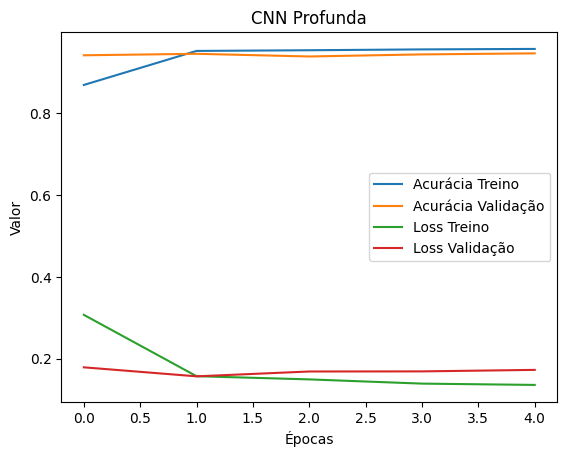

In [ ]:
plot_history(history_deep, title='CNN Profunda')


# Etapa 10: Save

In [ ]:
model_deep.save('cnn_profunda_sauron.h5')

# Etapa 11: Separar Dataset de Teste

In [ ]:
import os
import shutil
import random

#MOVER OS 10%
def mover_amostras(origem, destino, proporcao=0.1):
    os.makedirs(destino, exist_ok=True)
    arquivos = os.listdir(origem)
    random.shuffle(arquivos)
    n = int(len(arquivos) * proporcao)
    for arquivo in arquivos[:n]:
        shutil.move(os.path.join(origem, arquivo), os.path.join(destino, arquivo))

# Exemplo
mover_amostras('Imagens_Supeita_Sauron/Positivo', 'Imagens_Supeita_Sauron/Teste/Positivo')
mover_amostras('Imagens_Supeita_Sauron/Negativo', 'Imagens_Supeita_Sauron/Teste/Negativo')


# Etapa 12: Avaliação de Teste

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'Imagens_Supeita_Sauron/Teste',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 2755 images belonging to 2 classes.


## Avaliar ambos os modelos

In [ ]:
loss_simple, acc_simple = model_simple.evaluate(test_generator)
loss_deep, acc_deep = model_deep.evaluate(test_generator)

print(f'Acurácia CNN Simples: {acc_simple:.4f}')
print(f'Acurácia CNN Profunda: {acc_deep:.4f}')


87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.9433 - loss: 0.1747
86/87 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9699 - loss: 0.1092

2025-07-30 13:43:51.214178: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.14 = (f32[3,128,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,64,30,30]{3,2,1,0} %bitcast.467, f32[128,64,3,3]{3,2,1,0} %bitcast.474, f32[128]{0} %bitcast.476), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1_1/conv2d_4_1/convolution" source_file="/home/nirto/projetos/.venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-07-30 13:43:51.305859: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potential

87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.9697 - loss: 0.1096
Acurácia CNN Simples: 0.9459
Acurácia CNN Profunda: 0.9586


In [ ]:
model_deep.save('modelo_final_cnn_sauron.h5')